# Clean version of the no picking notebook

In [1]:
#pip install molmass
!{sys.executable} -m pip install mass-spec-utils


In [3]:
import sys,os,glob
import numpy as np
import pylab as plt
%matplotlib inline
from molmass import Formula
from scipy.optimize import minimize

In [4]:
%load_ext autoreload
%autoreload 2

In [9]:
!pip listimageio

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.4.2
astropy                            4.0.1.post1
atomicwrites                       1.4.0
attrs                              19.3.0
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.1.7
beautifulsoup4                     4.9.1
bitarray                           1.4.0
bkcharts                           0.2
bleach                         

In [25]:
from mass_spec_utils.adduct_calculator.adduct_rules import AdductTransformer
from mass_spec_utils.data_import import MZMLFile


ModuleNotFoundError: No module named &#39;mass_spec_utils.ms2_matching&#39;

In [6]:
from lipid_kinetics import fit,get_iso_intense

ModuleNotFoundError: No module named &#39;lipid_kinetics&#39;

In [2]:
condition = 1
ion_mode = 'Pos'

In [3]:
mzml_folder = '/home/simon/data/lipid_files/lipid_files/Condition_{}/{}/'.format(condition,ion_mode)

In [4]:
mzml_files = glob.glob(os.path.join(mzml_folder,'*.mzML'))
for f in mzml_files:
    print(f.split(os.sep)[-1])


### make file / time dict: will be in excel

In [5]:
file_time = []
for f in mzml_files:
    last_bit = f.split(os.sep)[-1]
    sample_time = int(last_bit.split('_')[0])
    print(sample_time)
    if sample_time == 24:
        continue
    else:
        file_time.append((f,sample_time))
file_time.sort(key = lambda x: x[1])

In [6]:
mzml_file_objs = {}
for f in mzml_files:
    mzml_file_obj = MZMLFile(f)
    mzml_file_objs[f] = mzml_file_obj

### lipid info, will come from excel

In [7]:
rt_tol = 10
mz_tol = 0.01

lipids = {'PC 34:1':('C42H82NO8P','C42H81DNO8P',760.5836,10.47*60,'[M+H]+'),
          'PC 34:2':('C42H80NO8P','C42H79DNO8P',758.5677,9.78*60.0,'[M+H]+'),
          'PC 34:0':('C42H84NO8P','C42H83DNO8P',762.5997,11.2*60.0,'[M+H]+'),
          'PC 34:0p':('C42H84NO7P','C42H83DNO7P',746.8044,11.03*60.0,'[M+H]+'),
          'PC 38:5p':('C43H76NO7P','C43H75DNO7P',750.5421,10.63*60.0,'[M+H]+'),
          'PC 38:4p':('C43H78NO7P','C43H77DNO7P',752.5577,11.3*60.0,'[M+H]+'),
         }
lipid_dict = {l:{} for l in lipids}
for l in lipids:
    lipid_dict[l]['formula'] = lipids[l][0]
    lipid_dict[l]['target_mz'] = None
    lipid_dict[l]['rt_range'] = (lipids[l][3] - rt_tol,lipids[l][3] + rt_tol)
    lipid_dict[l]['adduct_type'] = '[M+H]+'
    lipid_dict[l]['n_iso'] = 5
print(lipid_dict)

{'PC 34:1': {'formula': 'C42H82NO8P', 'target_mz': None, 'rt_range': (618.2, 638.2), 'adduct_type': '[M+H]+', 'n_iso': 5}, 'PC 34:2': {'formula': 'C42H80NO8P', 'target_mz': None, 'rt_range': (576.8, 596.8), 'adduct_type': '[M+H]+', 'n_iso': 5}, 'PC 34:0': {'formula': 'C42H84NO8P', 'target_mz': None, 'rt_range': (662.0, 682.0), 'adduct_type': '[M+H]+', 'n_iso': 5}, 'PC 34:0p': {'formula': 'C42H84NO7P', 'target_mz': None, 'rt_range': (651.8, 671.8), 'adduct_type': '[M+H]+', 'n_iso': 5}, 'PC 38:5p': {'formula': 'C43H76NO7P', 'target_mz': None, 'rt_range': (627.8000000000001, 647.8000000000001), 'adduct_type': '[M+H]+', 'n_iso': 5}, 'PC 38:4p': {'formula': 'C43H78NO7P', 'target_mz': None, 'rt_range': (668.0, 688.0), 'adduct_type': '[M+H]+', 'n_iso': 5}}


### main loop

In [8]:
from lipid_kinetics import compute_lipid_kinetics,create_plot
output_dict = {}
for lipid in lipids:
# for lipid in ['PC 34:1']:
        
    output_dict[lipid] = compute_lipid_kinetics(lipid,lipid_dict[lipid],file_time,mzml_file_objs)
    
    times = output_dict[lipid]['times']
    data_mat = output_dict[lipid]['data_mat']
    k,a0,ai = output_dict[lipid]['kinetic_parameters']
    
    
    create_plot(lipid,output_dict[lipid],output_filename = 'test.png')
    
    print(output_dict[lipid]['all_isos'])


ModuleNotFoundError: No module named 'lipid_kinetics'

In [9]:
from lipid_kinetics import create_plot
create_plot(lipid,output_dict[lipid],output_filename = 'test.png')


ModuleNotFoundError: No module named 'lipid_kinetics'

In [51]:
import xlsxwriter

In [55]:
workbook = xlsxwriter.Workbook('test.xlsx')
worksheet = workbook.add_worksheet()
worksheet.insert_image('A1','test.png')
workbook.close()

Writing:  temp_0.png
Writing:  temp_1.png
Writing:  temp_2.png
Writing:  temp_3.png
Writing:  temp_4.png
Writing:  temp_5.png


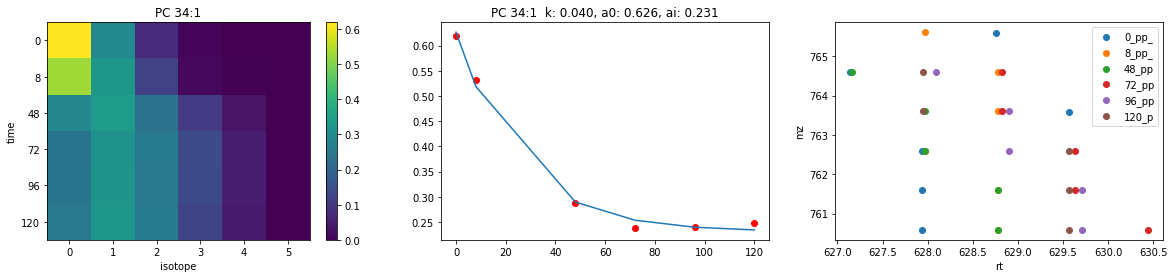

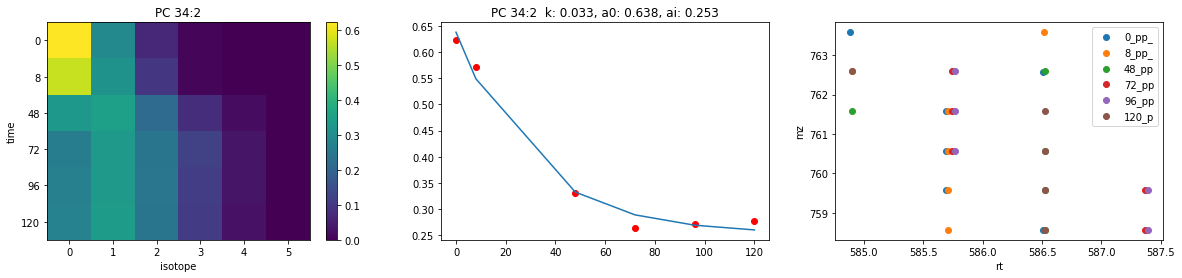

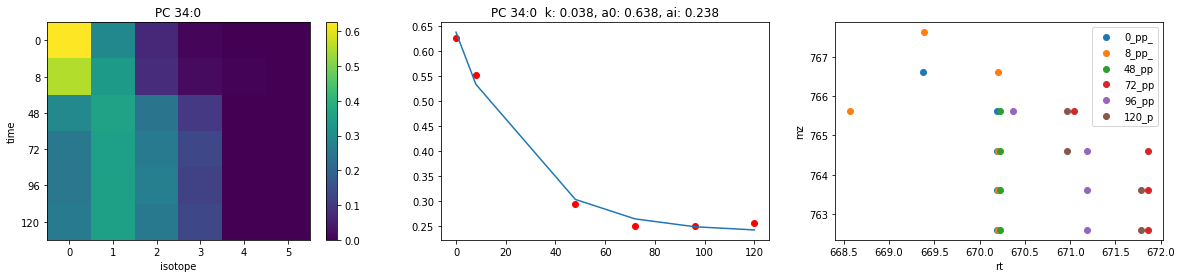

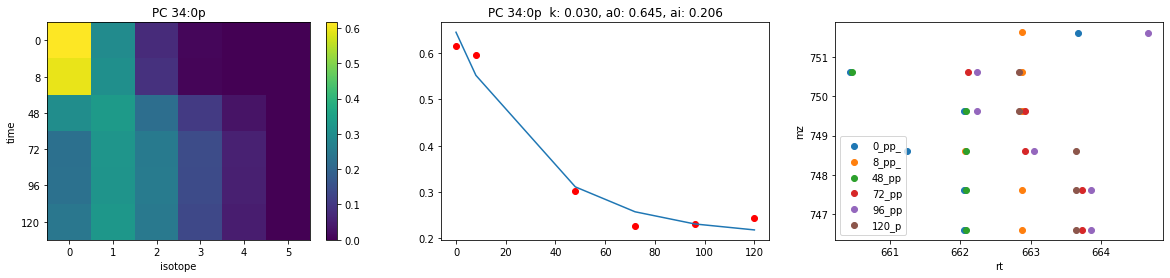

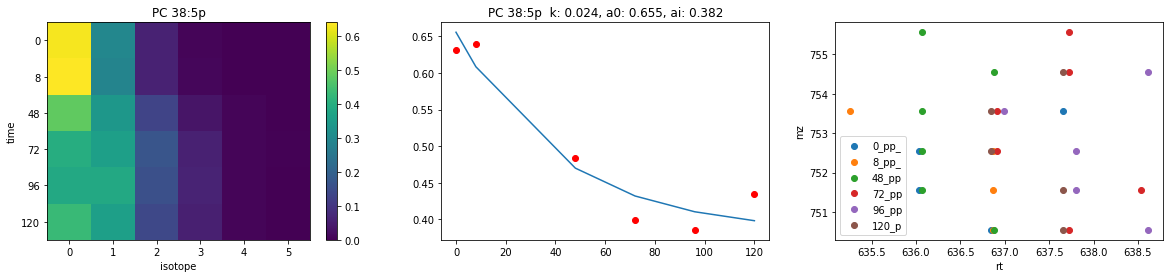

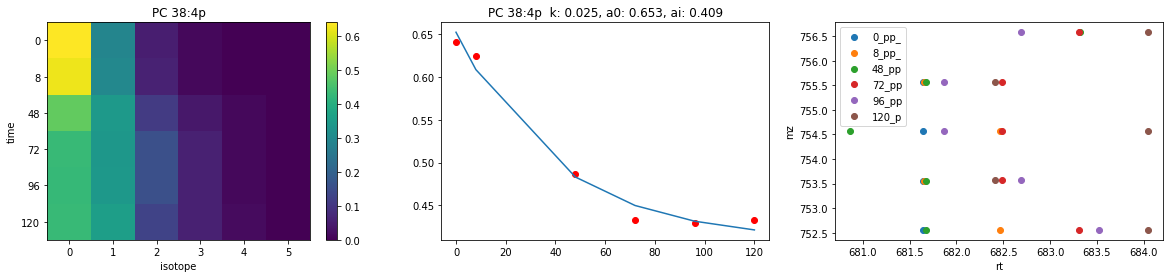

In [86]:
from lipid_kinetics import create_xlsx_output
create_xlsx_output(output_dict)